In [1]:
import astropy.units as u
import numpy as np
import warnings 
import sys 
warnings.filterwarnings('ignore')
sys.path.append('./../')

from tools_contsub_main import *
from tools_contsub_misc import *
from tools_contsub_units import *
from tools_contsub_plots import *
from tools_contsub_anchoring import * 
from tools_contsub_smoothregrid import * 
from tools_contsub_postprocess import * 

In [2]:
galaxy = 'ngc5236'
galaxy_muse = galaxy
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 
outputdir = 'hst_contsub_f673n/'

narrowband_filter = 'f673n'
instrument_f555w  = 'uvis'
instrument_f65Xn = 'uvis'
instrument_f814w = 'uvis'

hdu_hst_f555w   = get_hdu(rootdir, 'hst/*%s_*f547m*.fits' %(instrument_f555w))
hdu_hst_f65Xn   = get_hdu(rootdir, 'hst/*%s_*%s*.fits' %(instrument_f65Xn, narrowband_filter))
hdu_hst_f814w   = get_hdu(rootdir, 'hst/*%s_*f814w*.fits' %(instrument_f814w))

# Get filter curve info
bp = get_bandpassinfo(rootdir_bp)

# Cosmic ray thresholds
cr_threshold = 0.25
cr_dilation_iterations = 1

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc5236/hst/hlsp_m83mos_hst_wfc3-uvis_m83-mosaic_f555w-f547m_v1_drc-sci_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc5236/hst/hlsp_m83mos_hst_wfc3-uvis_m83-mosaic_f673n_v1_drc-sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc5236/hst/hlsp_m83mos_hst_wfc3-uvis_m83-mosaic_f814w_v1_drc-sci_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F550M.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F814W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F657N.dat
/Users/abar

In [3]:
def make_plots_map(hdu, galaxy, filter, rootdir='./', appdir='hst_contsub/', smooth=True, smooth_factor=3, resolution = 0.07*u.arcsec):

    cmap1 = plt.cm.binary(np.linspace(0., 1, 16))
    cmap2 = colorcet.cm.fire(np.linspace(0, 1, 256))
    cmaplist = np.vstack((cmap1, cmap2))
    cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
    cmap.set_under(cmap(0))
    cmap.set_over(cmap(-1))
    cmap.set_bad(color=cmap(0))


    hdu = remove_nan_padding(hdu)
    hdu = get_smooth(hdu, resolution, resolution*smooth_factor)
    data = hdu.data

    data[data==0] = np.nan
    hdu.data = data

    fig = plt.figure(figsize=(10, 10))
    ax = aplpy.FITSFigure(hdu, figure=fig)

    vmin = np.nanpercentile(data, 1)
    vmax = np.nanpercentile(data, 99.99)
    ax.show_colorscale(vmin=vmin, vmax=vmax, cmap=cmap, interpolation='none')

    bbox = dict(boxstyle='round', fc="w", ec="k")
    ax.add_label(0.05, 0.95, galaxy,  ha='left', va='top', size=20, bbox = bbox, relative=True)
    ax.ticks.set_color('black')

    ax.tick_labels.set_xformat('hh:mm:ss')
    ax.tick_labels.set_yformat('hh:mm:ss')

    ax_plot = fig.get_axes()[0]
    ax_plot.grid(True, ls=':', color='k', alpha=0.3)

    fig.savefig(rootdir+appdir+'/figs/%s_map_%s.png' %(galaxy, filter), bbox_inches='tight')

[Info] Outputing to the following: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc5236/hst_contsub_f673n/
[INFO] Remove NaN values around edge of image...
[INFO] Reprojecting the input image to match the template WCS...
[INFO] Performing image reprojection...
[INFO] Image reprojection complete.
[INFO] Scaling the output data to conserve flux with factor 1.00
[INFO] Flux scaling complete.
[INFO] Reprojection process completed.
[INFO] Reprojecting the input image to match the template WCS...
[INFO] Performing image reprojection...
[INFO] Image reprojection complete.
[INFO] Scaling the output data to conserve flux with factor 1.00
[INFO] Flux scaling complete.
[INFO] Reprojection process completed.
[INFO] Remove NaN values around edge of image...
[INFO] Pixel scale: 0.04 arcsec arcsec
[INFO] Initial Resolution: 0.07 arcsec arcsec
[INFO] Desired Resolution: 0.21 arcsec arcsec
[INFO] Convolution kernel: 0.20 arcsec arcsec
[INFO] Performing image convolution...
[INFO] Image

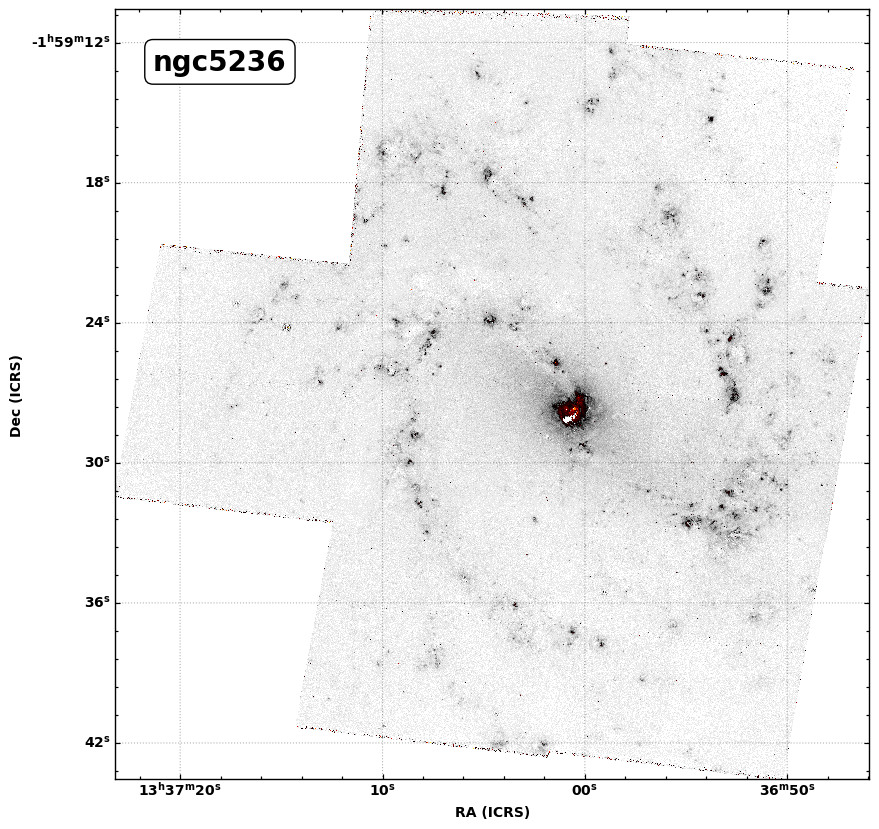

In [9]:
# Make paths
make_paths(rootdir, outputdir)

# Convert units 
hdu_hst_f555w = get_nanzeros(hdu_hst_f555w)
hdu_hst_f65Xn = get_nanzeros(hdu_hst_f65Xn)
hdu_hst_f814w = get_nanzeros(hdu_hst_f814w)

hdu_hst_f65Xn = remove_nan_padding(hdu_hst_f65Xn)
hdu_hst_f555w = get_regrid(hdu_hst_f555w, hdu_hst_f65Xn)
hdu_hst_f814w = get_regrid(hdu_hst_f814w, hdu_hst_f65Xn)

hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w = get_covmask(hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w)

hdu_hst_f555w = get_electrons_2_ergcm2sA(hdu_hst_f555w)
hdu_hst_f65Xn = get_electrons_2_ergcm2sA(hdu_hst_f65Xn)
hdu_hst_f814w = get_electrons_2_ergcm2sA(hdu_hst_f814w)

# Continuum subtract       
hdu_hst_halpha, hdu_hst_cont = get_contsub(hdu_hst_f65Xn.copy(), 
                                hdu_hst_f555w.copy(), 
                                hdu_hst_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

# Convert units
photbw = bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['rectwidth']
hdu_hst_halpha = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha, photbw)
hdu_hst_cont = get_ergcm2sA_2_ergcm2s(hdu_hst_cont, photbw)

# Make maps plots
make_plots_map(hdu_hst_halpha, galaxy, 'hst_%s_contsub' %narrowband_filter, rootdir, appdir=outputdir)

# Save files
write_hdu(hdu_hst_halpha, rootdir, '%s_hst_%s_contsub.fits' %(galaxy, narrowband_filter), appdir=outputdir, compress=True)
write_hdu(hdu_hst_cont, rootdir, '%s_hst_%s_cont.fits' %(galaxy, narrowband_filter), appdir=outputdir, compress=True)

In [10]:
# Cosmic ray thresholds
cr_threshold = 0.25
cr_dilation_iterations = 1

# Coverage mask
hdu_mask = get_mask(hdu_hst_halpha)

# Interpolate negatives
hdu_hst_halpha_i = get_interp_negs(hdu_hst_halpha, hdu_mask)

# Remove cosmic rays
hdu_hst_halpha_c = get_cosmicrays(hdu_hst_halpha, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)
hdu_hst_halpha_ic = get_cosmicrays(hdu_hst_halpha_i, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)

# Save files
write_hdu(hdu_hst_halpha_i, rootdir, '%s_hst_%s_contsub_i.fits' %(galaxy, narrowband_filter), appdir=outputdir)
write_hdu(hdu_hst_halpha_c, rootdir, '%s_hst_%s_contsub_c.fits' %(galaxy, narrowband_filter), appdir=outputdir)
write_hdu(hdu_hst_halpha_ic, rootdir, '%s_hst_%s_contsub_ic.fits' %(galaxy, narrowband_filter), appdir=outputdir)

[INFO] Negative values processed
[INFO] [deepCR] Running deepCR...
[INFO] [deepCR] Running with patch=1024
[INFO] [deepCR] Dilation of deepCR mask...
[INFO] [deepCR] Interpolated deepCR mask...
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc5236/hst_contsub_f673n/ngc5236_hst_f673n_contsub_i.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc5236/hst_contsub_f673n/ngc5236_hst_f673n_contsub_ic.fits


In [11]:
hdu_hst_halpha_c = get_cosmicrays(hdu_hst_halpha, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)
write_hdu(hdu_hst_halpha_c, rootdir, '%s_hst_%s_contsub_c.fits' %(galaxy, narrowband_filter), appdir=outputdir)

[INFO] [deepCR] Running deepCR...
[INFO] [deepCR] Running with patch=1024
[INFO] [deepCR] Dilation of deepCR mask...
[INFO] [deepCR] Interpolated deepCR mask...
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc5236/hst_contsub_f673n/ngc5236_hst_f673n_contsub_c.fits
